In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CS5344 Big Data')
path_to_file = '/content/drive/MyDrive/Colab Notebooks/CS5344 Big Data/'
os.chdir(path_to_file)
!pwd

/content/drive/MyDrive/Colab Notebooks/CS5344 Big Data


In [ ]:
import pandas as pd 
import numpy as np
from nltk.corpus import stopwords 
from collections import Counter
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)
    return s

In [ ]:
# data = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding="ISO-8859-1",names=["target", "ids", "date", "flag", "user", "text"])

data = pd.read_csv('keyword_tweets_UkraineRussianWar_70k_rows_clean_Outcome.csv', index_col=0)

In [ ]:
data.head()

,Time,Tweet,Tweet_Clean,prob,result
0,2022-10-16 12:43:16,If Putin-Russia looses and wants us to stop th...,putin russia looses wants us stop sanctions wo...,0.518092,1
1,2022-10-16 12:42:29,RT @newsistaan: Belarusian media report at lea...,rt belarusian media report least 6 mig 31s dag...,0.610277,1
2,2022-10-16 12:42:06,"Ukraine Under Russian Jets, Jets Carrying Hype...",ukraine russian jets jets carrying hypersonic ...,0.574477,1
3,2022-10-16 12:40:55,RT @owarino_outsuke: 🇺🇦🇷🇺A HIMARS missle is ab...,rt himars missle hit russian positions direction,0.571792,1
4,2022-10-16 12:40:45,@elonmusk Stick a pin in your arse and deflate...,stick pin arse deflate ego horror unspeakable ...,0.493232,0


In [ ]:
data_neg = data[data.result == 0]
text_neg = " ".join(text for text in data_neg.Tweet_Clean)


In [ ]:
text_neg[:100]

'stick pin arse deflate ego horror unspeakable acts evil inflicted human bodies youre butt hurt tweet'

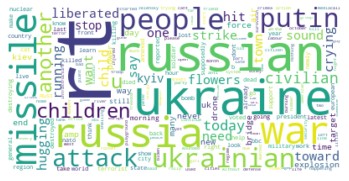

In [ ]:
word_cloud_neg = WordCloud(collocations = False, background_color = 'white').generate(text_neg)
plt.imshow(word_cloud_neg, interpolation='bilinear')
plt.axis("off")
# plt.show()
plt.savefig("./wordclouds/UkrainRussianWar_Negative_Sentiment_Word_Cloud.png", bbox_inches="tight")

In [ ]:
neg_list = []
neg_list.append(preprocess_string(word) for word in text_neg.lower().split())

In [ ]:
neg_list

[<generator object <genexpr> at 0x7f855611d8d0>]

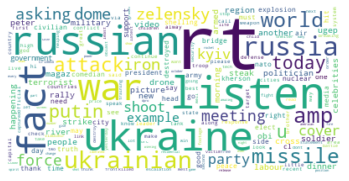

In [ ]:
data_pos = data[data.result == 1]
text_pos = " ".join(str(text) for text in data_pos.Tweet_Clean)
word_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
plt.imshow(word_cloud_pos, interpolation='bilinear')
plt.axis("off")
# plt.show()
plt.savefig("./wordclouds/UkrainRussianWar_Positive_Sentiment_Word_Cloud.png", bbox_inches="tight")

In [ ]:
new_df = data.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
 
new_df

In [ ]:
# Extreme sentiment
data["mytext_new"] = data['Tweet_Clean'].str.lower().str.replace('[^\w\s]','')


In [ ]:
data_pos = data[data.prob>0.8]
data_pos.count()

Time           13538
Tweet          13538
Tweet_Clean    13538
prob           13538
result         13538
mytext_new     13538
dtype: int64

In [ ]:
data_neg = data[data.prob<0.3]
data_neg.count()

Time           7305
Tweet          7305
Tweet_Clean    7305
prob           7305
result         7305
mytext_new     7305
dtype: int64

In [ ]:
new_pos = data_pos.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
 
new_pos.columns = ['Word', 'Frequency'] 
 
new_pos.head(20)

,Word,Frequency
0,rt,10710
1,listen,5955
2,facts,4504
3,10000,4496
4,asking,1429
5,iron,1421
6,dome,1419
7,10,1385
8,11,1294
9,today,1196


In [ ]:
new_neg = data_neg.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
 
new_neg.columns = ['Word', 'Frequency'] 
 
new_neg.head(20)

,Word,Frequency
0,rt,4096
1,ukraine,1155
2,children,948
3,another,909
4,crying,884
5,towards,876
6,running,872
7,child,868
8,liberated,864
9,town,859


In [ ]:
data.Time

0        2022-10-16 12:43:16
1        2022-10-16 12:42:29
2        2022-10-16 12:42:06
3        2022-10-16 12:40:55
4        2022-10-16 12:40:45
                ...         
69936    2022-10-07 22:51:27
69937    2022-10-07 22:51:01
69938    2022-10-07 22:50:29
69939    2022-10-07 22:50:14
69940    2022-10-07 22:45:41
Name: Time, Length: 69941, dtype: object

In [ ]:
data['Date'] = pd.to_datetime(data['Time']).dt.date

In [ ]:
data.head()

,Time,Tweet,Tweet_Clean,prob,result,mytext_new,Date
0,2022-10-16 12:43:16,If Putin-Russia looses and wants us to stop th...,putin russia looses wants us stop sanctions wo...,0.518092,1,putin russia looses wants us stop sanctions wo...,2022-10-16
1,2022-10-16 12:42:29,RT @newsistaan: Belarusian media report at lea...,rt belarusian media report least 6 mig 31s dag...,0.610277,1,rt belarusian media report least 6 mig 31s dag...,2022-10-16
2,2022-10-16 12:42:06,"Ukraine Under Russian Jets, Jets Carrying Hype...",ukraine russian jets jets carrying hypersonic ...,0.574477,1,ukraine russian jets jets carrying hypersonic ...,2022-10-16
3,2022-10-16 12:40:55,RT @owarino_outsuke: 🇺🇦🇷🇺A HIMARS missle is ab...,rt himars missle hit russian positions direction,0.571792,1,rt himars missle hit russian positions direction,2022-10-16
4,2022-10-16 12:40:45,@elonmusk Stick a pin in your arse and deflate...,stick pin arse deflate ego horror unspeakable ...,0.493232,0,stick pin arse deflate ego horror unspeakable ...,2022-10-16


In [ ]:
df_grouped_sentiment = (data.groupby(['Date', 'Date'])['result'].value_counts().unstack().reset_index(level=0, drop=True))
df_grouped_sentiment['rate'] = df_grouped_sentiment[0]/(df_grouped_sentiment[0]+df_grouped_sentiment[1])

In [ ]:
df_grouped_sentiment

result,0,1,rate
Date,,,
2022-10-07,88,47,0.651852
2022-10-08,214,653,0.246828
2022-10-09,740,1820,0.289062
2022-10-10,6894,14064,0.328944
2022-10-11,4322,13646,0.240539
2022-10-12,3159,10451,0.232109
2022-10-13,2588,5952,0.303044
2022-10-14,1017,2178,0.318310
2022-10-15,423,1191,0.262082


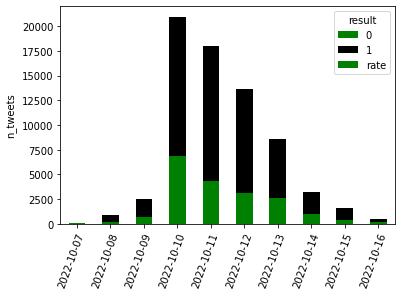

In [ ]:

ax = df_grouped_sentiment.plot.bar(stacked=True, color=['green', 'black'])
ax.set_xticklabels(labels=df_grouped_sentiment.index, rotation=70, rotation_mode="anchor", ha="right")
ax.set_xlabel('')
ax.set_ylabel('n_tweets');

# Monday, 10 October
# October 2022 missile strikes on Ukraine

In [ ]:
import datetime
df_ten = data.loc[data['Date']== datetime.date(2022, 10, 10)]

In [ ]:
df_ten.head()

,Time,Tweet,Tweet_Clean,prob,result,mytext_new,Date
45421,2022-10-10 23:59:48,say no without having to explain yourself @mmo...,say without explain,0.388216,0,say without explain,2022-10-10
45422,2022-10-10 23:59:40,RT @mo324523: #Sanandaj_In_Blood is under atta...,rt attack murdering many young people also sen...,0.415770,0,rt attack murdering many young people also sen...,2022-10-10
45423,2022-10-10 23:59:36,RT @SocratesBigBird: Russia -as currently lead...,rt russia currently lead vladimir putin mass m...,0.719843,1,rt russia currently lead vladimir putin mass m...,2022-10-10
45424,2022-10-10 23:59:26,https://t.co/HS2aRTFVzN Join The Link for Free...,join link free setups free signals guess work ...,0.912757,1,join link free setups free signals guess work ...,2022-10-10
45425,2022-10-10 23:59:18,RT @its_savior: #UkraineUnderAttack #UkraineRu...,rt asking iron dome listen,0.841755,1,rt asking iron dome listen,2022-10-10


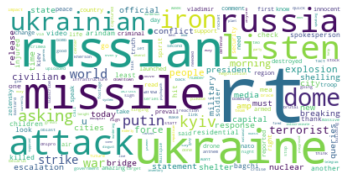

In [ ]:
df_ten_pos = df_ten[df_ten.result == 1]
text_pos = " ".join(str(text) for text in df_ten_pos.Tweet_Clean)
word_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
plt.imshow(word_cloud_pos, interpolation='bilinear')
plt.axis("off")
# plt.show()
plt.savefig("./wordclouds/UkrainRussianWar_Positive_Sentiment_Word_Cloud_Oct_10.png", bbox_inches="tight")

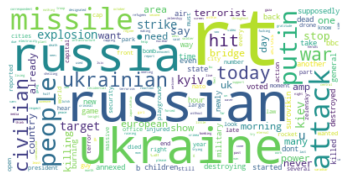

In [ ]:
df_ten_neg = df_ten[df_ten.result == 0]
text_neg = " ".join(str(text) for text in df_ten_neg.Tweet_Clean)
word_cloud_neg = WordCloud(collocations = False, background_color = 'white').generate(text_neg)
plt.imshow(word_cloud_neg, interpolation='bilinear')
plt.axis("off")
# plt.show()
plt.savefig("./wordclouds/UkrainRussianWar_Negative_Sentiment_Word_Cloud_Oct_10.png", bbox_inches="tight")

In [ ]:
data.describe()

,prob,result
count,69941.000000,69941.000000
mean,0.587146,0.719878
std,0.206387,0.449062
min,0.001840,0.000000
25%,0.475948,0.000000
50%,0.592783,1.000000
75%,0.745698,1.000000
max,0.996060,1.000000


In [ ]:
def result2(value):
    if value >0.75:
        return 1
    elif value >0.4:
        return 0.5
    else:
        return 0

data['result2'] = data['prob'].map(result2)

In [ ]:
data.result2.value_counts()

0.5    40715
1.0    17136
0.0    12090
Name: result2, dtype: int64

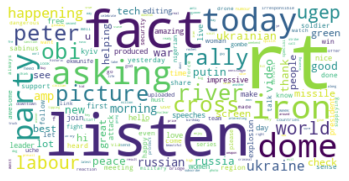

In [ ]:
data_pos = data[data.result2 == 1]
text_pos = " ".join(str(text) for text in data_pos.Tweet_Clean)
word_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
plt.imshow(word_cloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
data.sort_values(by = 'prob', ascending=False)

,Time,Tweet,Tweet_Clean,prob,result,mytext_new,Date,result2
43436,2022-10-11 04:15:49,"“A beautiful morning does not solve all your problems, but it gives you a good start to solve any of your problems. Good morning!”\n\n#BiggBossTamil6 #FitbitSense2 #BiggBossTelugu6 #BengaliHindusAttacked #UkraineRussianWar #GPMuthu #PawanKalyan #Chennaijobs #Accountantjobs",beautiful morning solve problems gives good start solve problems good morning,0.996060,1,beautiful morning solve problems gives good start solve problems good morning,2022-10-11,1.0
41652,2022-10-11 07:37:10,Happy Birthday to the Great commander of the #Russian Military Operation in #NaziUkraine 🇷🇺🐻🇷🇺\n\nMay your day shine brighter than the faces of the #ukronazis when they see kalibr flying over their heads 💥🚀🚀\n#UkraineRussianWar #KyivUnderAttack #Kherson #Zaporizhzhya #Russia https://t.co/03gSS7CZ50,happy birthday great commander military operation may day shine brighter faces see kalibr flying heads,0.995936,1,happy birthday great commander military operation may day shine brighter faces see kalibr flying heads,2022-10-11,1.0
68370,2022-10-09 14:54:14,"Happy birthday, Vladimir, happy birthday !!!! 🤣🤣🤣🤣😂😜😎💣💣💣💣💣💣\n#UkraineRussianWar https://t.co/av3UI9t7xR",happy birthday vladimir happy birthday,0.995730,1,happy birthday vladimir happy birthday,2022-10-09,1.0
13327,2022-10-13 01:28:54,̍Amazing email list for my #business. The list was exactly as expected. Thank you so much! ✋\n\n👉https://t.co/c03NyKvt9m\n\n#chel #ukrainerussianwar #cnftcon2022 #lafc #realestate #uci #newdaywithnadine #makeyourown https://t.co/NQlBnu6e5S,amazing email list list exactly expected thank much,0.995399,1,amazing email list list exactly expected thank much,2022-10-13,1.0
44653,2022-10-11 01:44:16,@WTOL11Toledo Thank love you buddy thank nana nana love us #UkraineRussianWar,thank love buddy thank nana nana love us,0.994923,1,thank love buddy thank nana nana love us,2022-10-11,1.0
...,...,...,...,...,...,...,...,...
62367,2022-10-10 08:15:11,"No more selfies in Kiev for Western Political Whores. \nSad, so sad. Crimea river.\n#UkraineRussianWar #Ukraine https://t.co/hT5dj1YBUw",selfies kiev western political whores sad sad crimea river,0.004989,0,selfies kiev western political whores sad sad crimea river,2022-10-10,0.0
43060,2022-10-11 05:01:16,"😥Lion Bretsel from Natalia Popova and UAnimals Wild Animal Rescue Center was injured during the shelling of Kyiv. It was very frightened by the loud explosions and, trying to escape, hurt itself. \n\n#UkraineRussianWar #russiaisateroriststate #Pedoputin #RussiaTerroristState https://t.co/LrmGmm6y1A",lion bretsel natalia popova uanimals wild animal rescue center injured shelling kyiv frightened loud explosions trying escape hurt,0.004816,0,lion bretsel natalia popova uanimals wild animal rescue center injured shelling kyiv frightened loud explosions trying escape hurt,2022-10-11,0.0
64010,2022-10-10 07:09:09,Damn war! Damn those stupids justifying death for freedom! Damn those who sell weapons! Damn those who use weapons! Just stop killing each other! \n#UkraineRussianWar #BreakingNews #BREAKING,damn war damn stupids justifying death freedom damn sell weapons damn use weapons stop killing,0.003842,0,damn war damn stupids justifying death freedom damn sell weapons damn use weapons stop killing,2022-10-10,0.0
18186,2022-10-12 16:09:17,The black areas on the Ukrainian map have no power at all. The stripped regions have partial power. This is going to hurt.... And Ukraine will not be alone in this hurt. #RussiaUkraineWar \n\n#ZaidHamid #GlobalReset #WEF #NWO #UkraineRussianWar \n\nhttps://t.co/K3lkpDewFk,black areas ukrainian map power stripped regions partial power going hurt ukraine alone hurt,0.002637,0,black areas ukrainian map power stripped regions partial power going hurt ukraine alone hurt,2022-10-12,0.0


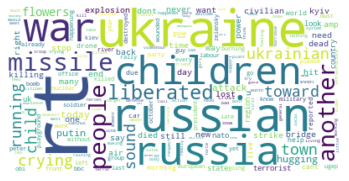

In [ ]:
data_neg = data[data.result2 == 0]
text_neg = " ".join(str(text) for text in data_neg.Tweet_Clean)
word_cloud_neg = WordCloud(collocations = False, background_color = 'white').generate(text_neg)
plt.imshow(word_cloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_grouped_sentiment2 = (data[data.result2!=0.5].groupby(['Date', 'Date'])['result2'].value_counts().unstack().reset_index(level=0, drop=True))
df_grouped_sentiment2

result2,0.0,1.0
Date,,
2022-10-07,79,25
2022-10-08,151,172
2022-10-09,369,295
2022-10-10,4144,4018
2022-10-11,2713,6602
2022-10-12,1936,4045
2022-10-13,1741,1096
2022-10-14,637,377
2022-10-15,247,405


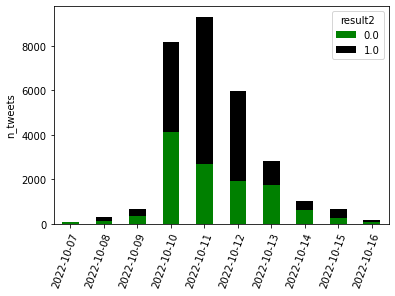

In [ ]:
ax = df_grouped_sentiment2.plot.bar(stacked=True, color=['green', 'black'])
ax.set_xticklabels(labels=df_grouped_sentiment2.index, rotation=70, rotation_mode="anchor", ha="right")
ax.set_xlabel('')
ax.set_ylabel('n_tweets');

In [ ]:
df_grouped_sentiment2['rate'] = df_grouped_sentiment2[0]/(df_grouped_sentiment2[0]+df_grouped_sentiment2[1])
df_grouped_sentiment2

result2,0.0,1.0,rate
Date,,,
2022-10-07,79,25,0.759615
2022-10-08,151,172,0.467492
2022-10-09,369,295,0.555723
2022-10-10,4144,4018,0.507719
2022-10-11,2713,6602,0.291251
2022-10-12,1936,4045,0.323692
2022-10-13,1741,1096,0.613676
2022-10-14,637,377,0.628205
2022-10-15,247,405,0.378834


In [ ]:
data[data.Date==datetime.date(2022, 10, 13)].sort_values(by = 'prob', ascending=False)
# Noisy data (marketing but using trending hashtag)
# Negative sentiment seems more accurate

,Time,Tweet,Tweet_Clean,prob,result,mytext_new,Date,result2
13327,2022-10-13 01:28:54,̍Amazing email list for my #business. The list was exactly as expected. Thank you so much! ✋\n\n👉https://t.co/c03NyKvt9m\n\n#chel #ukrainerussianwar #cnftcon2022 #lafc #realestate #uci #newdaywithnadine #makeyourown https://t.co/NQlBnu6e5S,amazing email list list exactly expected thank much,0.995399,1,amazing email list list exactly expected thank much,2022-10-13,1.0
12199,2022-10-13 04:54:10,Thank so much.\nShare this thread.\nFollow @Evolveeliminate \n#chainsawman #RHOBH #زواج_غازي_الذيابي #UkraineRussianWar #เดี่ยว13 #intihar #ItsSugaHyung #PrayForRicoSwavey #JUNGKOOK #HappyJiminDay #napaja #BarcelonaInter \n\nhttps://t.co/5xa8A0r6Ct,thank much share thread follow 13,0.993804,1,thank much share thread follow 13,2022-10-13,1.0
12460,2022-10-13 04:15:13,#HappyBirthdayPoojaHegde Happy birthday to the cutest star nd also good wishes for #KisiKaBhaiKisiKaJaan #UkraineRussianWar #intihar #KejriwalExposed #PakistanPremiKejariwal #TharkiKejriwal,happy birthday cutest star nd also good wishes,0.989501,1,happy birthday cutest star nd also good wishes,2022-10-13,1.0
12525,2022-10-13 04:05:49,Happy birthday 🎈🎂🎊🎉 darling love and light #BarcaInter #UkraineRussianWar #intihar #JIMINDAY @Grachidex https://t.co/82BlRyZEto,happy birthday darling love light,0.987500,1,happy birthday darling love light,2022-10-13,1.0
12368,2022-10-13 04:30:49,Good Morning 🌞 Cute friends.\n#BarcaInter #UkraineRussianWar #intihar #زواج_غازي_الذيابي #JIMINDAY #NFTCommunity,good morning cute friends,0.987072,1,good morning cute friends,2022-10-13,1.0
...,...,...,...,...,...,...,...,...
12179,2022-10-13 04:57:36,RT @Milan8662: Sad orc.#UkraineRussianWar https://t.co/3BxA9wegbp,rt sad orc,0.009244,0,rt sad orc,2022-10-13,0.0
12623,2022-10-13 03:43:39,RT @Milan8662: Sad orc.#UkraineRussianWar https://t.co/3BxA9wegbp,rt sad orc,0.008872,0,rt sad orc,2022-10-13,0.0
9354,2022-10-13 12:33:54,"Not wanting nuclear bombs to fall on eastern Europe is now a far right ideology, how sad is that. #LiberalismIsAMentalDisease #LiberalHypocrisy #LiberalsMustGo #NWO #RussiaUkraineWar #Russians #Ukraine️ #UkraineRussianWar #UkrainianArmy #UkraineWarNews #russiansoldiers https://t.co/cJFh8WIdpU",wanting nuclear bombs fall eastern europe far right ideology sad,0.008111,0,wanting nuclear bombs fall eastern europe far right ideology sad,2022-10-13,0.0
7114,2022-10-13 18:41:51,"The boy who was pulled out from under the rubble died - the head of the Mykolayiv OVA. 😭\n ""They brought him to the regional hospital for dialysis, and there he had a cardiac arrest."" #UkraineRussianWar #Ukraine️ #RussiaIsATerroristState #RussiaIsANaziState #RussianWarCrimes https://t.co/Ps77duLB2F",boy pulled rubble died head mykolayiv ova brought regional hospital dialysis cardiac arrest,0.005739,0,boy pulled rubble died head mykolayiv ova brought regional hospital dialysis cardiac arrest,2022-10-13,0.0


In [ ]:
data[data.Date==datetime.date(2022, 10, 13)].sort_values(by = 'prob', ascending=False).head(20)

,Time,Tweet,Tweet_Clean,prob,result,mytext_new,Date,result2
13327,2022-10-13 01:28:54,̍Amazing email list for my #business. The list was exactly as expected. Thank you so much! ✋\n\n👉https://t.co/c03NyKvt9m\n\n#chel #ukrainerussianwar #cnftcon2022 #lafc #realestate #uci #newdaywithnadine #makeyourown https://t.co/NQlBnu6e5S,amazing email list list exactly expected thank much,0.995399,1,amazing email list list exactly expected thank much,2022-10-13,1.0
12199,2022-10-13 04:54:10,Thank so much.\nShare this thread.\nFollow @Evolveeliminate \n#chainsawman #RHOBH #زواج_غازي_الذيابي #UkraineRussianWar #เดี่ยว13 #intihar #ItsSugaHyung #PrayForRicoSwavey #JUNGKOOK #HappyJiminDay #napaja #BarcelonaInter \n\nhttps://t.co/5xa8A0r6Ct,thank much share thread follow 13,0.993804,1,thank much share thread follow 13,2022-10-13,1.0
12460,2022-10-13 04:15:13,#HappyBirthdayPoojaHegde Happy birthday to the cutest star nd also good wishes for #KisiKaBhaiKisiKaJaan #UkraineRussianWar #intihar #KejriwalExposed #PakistanPremiKejariwal #TharkiKejriwal,happy birthday cutest star nd also good wishes,0.989501,1,happy birthday cutest star nd also good wishes,2022-10-13,1.0
12525,2022-10-13 04:05:49,Happy birthday 🎈🎂🎊🎉 darling love and light #BarcaInter #UkraineRussianWar #intihar #JIMINDAY @Grachidex https://t.co/82BlRyZEto,happy birthday darling love light,0.987500,1,happy birthday darling love light,2022-10-13,1.0
12368,2022-10-13 04:30:49,Good Morning 🌞 Cute friends.\n#BarcaInter #UkraineRussianWar #intihar #زواج_غازي_الذيابي #JIMINDAY #NFTCommunity,good morning cute friends,0.987072,1,good morning cute friends,2022-10-13,1.0
7201,2022-10-13 18:30:24,"@PM_ViktorOrban No peace talk! No ceasefire!\n\nOnly peace talk is Russia should get out of Ukraine!\n\nWill continue to support Ukraine with what are needed to humiliate Putin's Russia!\n\nAnd if Hungary does not like it, Hungary can get out of NATO!\n\nHungary is free to join CSTO!\n#UkraineRussianWar",peace talk ceasefire peace talk russia get ukraine continue support ukraine needed humiliate putins russia hungary like hungary get nato hungary free join csto,0.983879,1,peace talk ceasefire peace talk russia get ukraine continue support ukraine needed humiliate putins russia hungary like hungary get nato hungary free join csto,2022-10-13,1.0
7261,2022-10-13 18:23:15,Thank you to the whole world for supporting Ukraine. thank you to everyone who is making efforts and bringing our victory closer. The light will surely defeat the darkness! #Ukraine️ #UkraineRussianWar #War_in_Ukraine,thank whole world supporting ukraine thank everyone making efforts bringing victory closer light surely defeat darkness,0.979411,1,thank whole world supporting ukraine thank everyone making efforts bringing victory closer light surely defeat darkness,2022-10-13,1.0
5362,2022-10-13 23:36:30,RT @Tomiiigal: Happy Birthday To Yoruba Legend Sunday Igboho Oosa 🎂😍😍\n\n............\nBabcock James Brown Kizz Daniel #UkraineRussianWar #ASU…,rt happy birthday yoruba legend sunday igboho oosa babcock james brown kizz daniel,0.978143,1,rt happy birthday yoruba legend sunday igboho oosa babcock james brown kizz daniel,2022-10-13,1.0
7125,2022-10-13 18:40:11,"@PM_ViktorOrban Viktor Orban will be happy for Russia to take Eastern part of Hungary?!\n\nAfter Ukraine, Russia is coming for Hungary!\n\nAnd what will Viktor Orban do?\nImmediate ceasefire? Immediate peace talks?\n\nWhat a joke!\n\nRight now, it is time to humiliate Putin's Russia!\n\n#UkraineRussianWar",viktor orban happy russia take eastern part hungary ukraine russia coming hungary viktor orban immediate ceasefire immediate peace talks joke right time humiliate putins russia,0.977288,1,viktor orban happy russia take eastern part hungary ukraine russia coming hungary viktor orban immediate ceasefire immediate peace talks joke right time humiliate putins russia,2022-10-13,1.0
11016,2022-10-13 07:50:29,"""When you arise in the morning, think of what a precious privilege it is to be alive